# 2 Systems of difference equations

If there are multiple variables that are related through some kind of linear function, we can express the system of equations in matrix-vector notation. Simulating the system then works exactly the same way as previously, with the only difference that we are iterating an equation that consists of matrices and vectors, rather than scalars. In this tutorial, we will also touch upon transforming a higher-order system into a first-order system of higher dimensionality, as it makes the computation somewhat simpler.

In order to perform linear algebra, we will introduce the NumPy (Numerical Python) package. It is a package with specific array structures and highly optimised computational procedures. It is the standard that most machine learning and artificial intelligence applications are built upon, and, as a rule of thumb, should be used whenever you want to process numbers in Python.

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

# this renders text ni figures in Latex font
from matplotlib import rc
rc('text', usetex=True)

### 2.1 First-order 2D system

Consider the 2-dimensional system from tutorial 2, exercise 1:

$y_{t+1} = 0.7y_t + 0.3 z_t\\ z_{t+1} = 0.1y_t + 0.75 z_t + 15\\y_0=225;z_0=25$

##### EXERCISE

* re-write the system as a single equation of the form $\mathbf{x}_{t+1} = \mathbf{Ax}_t + \mathbf{g}_t$
* implement vectors as arrays and the matrix as a 2-dimensional array (nested array, i.e. arrays in an array)
* use numpy matrix multiplication to implement one time step in a function

##### SOLUTION

equation:
$\left(\begin{matrix}
        y_{t+1} \\z_{t+1}
    \end{matrix}\right) = \left(\begin{matrix}
            0.7 & 0.3\\
            0.1 & 0.75
        \end{matrix}\right)\left(\begin{matrix}
        y_{t} \\z_{t}
    \end{matrix}\right) +
        \left(\begin{matrix}
            0 \\ 15
        \end{matrix}\right)$
        
Make sure to use np.matmul() for matrix multiplication of arrays!

In [2]:
def system_1step(yz_t, A, g):
    return np.matmul(A, yz_t) + g

##### EXERCISE

Create the vectors yz_0, g, and the coefficient matrix A: 

##### SOLUTION

Use nested arrays (arrays in arrays, the inner level being rows of the matrix) to implement a matrix!

In [3]:
yz_0 = np.array([225, 25])
A = np.array([[0.7, 0.3], [0.1, 0.75]])
g = np.array([0,15])

##### EXERCISE

Write a for loop to iterate through the system $T$ times. Store the results in a $2\times (T+1)$ numpy array (one row per variable). Note that, unlike Python lists, numpy arrays are not variable in size. Hence, we first create an array of the size we will need to store all results. The second dimension is $T+1$, not T because we will obtain $T$ results, and we start with one set of initial values.

In [4]:
T = 25

# results array
results = np.empty((2, T+1))
# store initial values in results array
results[:,0] = yz_0

# before we apply the equation (function above) iteratively, a few checks to ensure the matrix and vector dimensions match
assert A.shape[0] == A.shape[1] # square matrix
assert yz_0.shape[0] == A.shape[0] # same length of vector and matrix
assert yz_0.shape == g.shape # same length of vectors

# loop
for t in range(T):
    # store the results in the correct part of the array!
    results[:,t+1] = system_1step(results[:,t], A, g)

In [5]:
results

array([[225.        , 165.        , 132.375     , 114.76875   ,
        105.3890625 , 100.50360937,  98.06264766,  96.94155246,
         96.52424048,  96.47408023,  96.60791729,  96.82681036,
         97.07795596,  97.33376502,  97.58037107,  97.81132437,
         98.02413666,  98.21839259,  98.39472161,  98.554242  ,
         98.69826371,  98.82813258,  98.94515171,  99.05054435,
         99.14543921,  99.23086741],
       [ 25.        ,  56.25      ,  73.6875    ,  83.503125  ,
         89.10421875,  92.36707031,  94.32566367,  95.55051252,
         96.35703964,  96.92020377,  97.33756085,  97.66396237,
         97.93065281,  98.15578521,  98.35021541,  98.52069866,
         98.67165643,  98.80615599,  98.92645625,  99.03431435,
         99.13115996,  99.21819634,  99.29646052,  99.36686056,
         99.43019985,  99.48719381]])

To examine the results, we will create one plot in which both variables are plotted over time, and one in the phase space. I use the subplots environment in matplotlib to combine both plots in a single figure.

Moreover, I am plotting the isoclines in the phase space. Those are lines at which *one* of the variables is in steady state. The intersection is obviously the point at which the entire system is in steady state. We calculate it by using the equation of one variable, setting it to its steady state value, and solving it so that we have a functional form of one variable in dependence of the other. Here that means:

Isocline of y:

$\bar{y} = 0.7\bar{y} = 0.3z_t \Leftrightarrow \bar{y}=z_t$

and of z:

$\bar{z} = 0.1y_t + 0.75\bar{z} + 15 \Leftrightarrow \bar{z} = 0.4y_t + 60$

Since this is a linear system, the isoclines are also linear functions in the phase space.

<IPython.core.display.Javascript object>


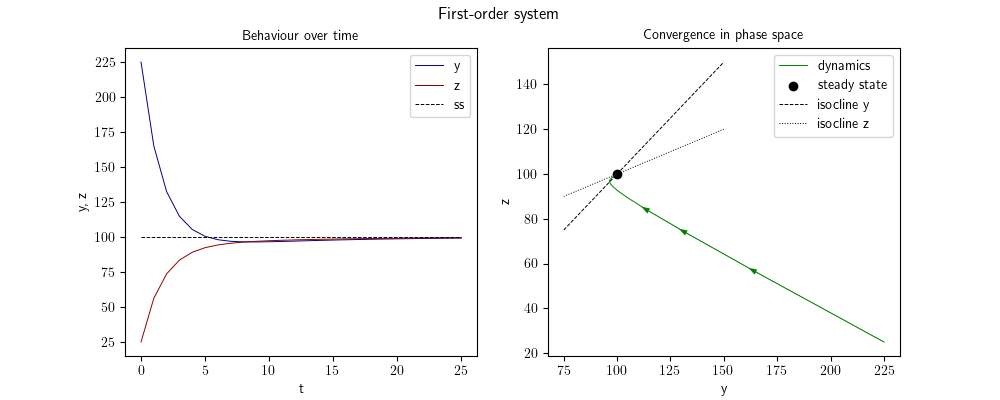

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
plt.suptitle("First-order system")

ax1.set_title("Behaviour over time", fontsize=10)
ax1.plot(results[0], color="darkblue", lw=0.7, label="y")
ax1.plot(results[1], color="darkred", lw=0.7, label="z")
ax1.plot([100]*(T+1), color="black", lw=0.7, ls="--", label="ss")
ax1.legend()

ax1.set_xlabel("t")
ax1.set_ylabel("y, z")

#######################

ax2.set_title("Convergence in phase space", fontsize=10)
ax2.plot(results[0], results[1], color="green", label="dynamics", lw=0.7)
ax2.scatter((100), (100), color="black", label="steady state")

###
# isoclines
y = np.array([75, 150]) # two points are enough for straight lines
ybar = y
zbar = 0.4*y + 60
# plot iscoclines
ax2.plot(y, ybar, color="black", lw=0.7, ls="--", label="isocline y")
ax2.plot(y, zbar, color="black", lw=0.7, ls=":", label="isocline z")

# arrows for the first 3 steps to indicate direction of motion
for i in range(3):
    x = results[0, i]
    y = results[1, i]
    dx = results[0, i+1] - results[0, i]
    dy = results[1, i+1] - results[1, i]
    ax2.arrow(x, y, dx, dy, color="green", lw=0.1, head_width=2.5)
    

ax2.set_xlabel("y")
ax2.set_ylabel("z")
ax2.legend()

Zoom into the phase space to see more detail of the behaviour in the vincinity of the steady state. As a bonus exercise, you could try to run this system from many different starting points and plot a variety of paths in the phase space, to show the converging behaviour from all points of the phase space.

### 2.2 Second-order difference equation as first-order 2d system

In the second exercise, we will convert the second-order difference equation from the first PC tutorial $y_t = 1.1y_{t-1} - 0.6y_{t-2} + 1100$ into a 2-dimensional system of first-order equations.

##### EXERCISE

First, set up the first-order system (2d system of first-order differential equations):

##### SOLUTION

We introduce an auxiliary variable $z_t = y_{t-1}$. The equation then becomes the following first order system

$y_t = 1.1y_{t-1} - 0.6 z_{t-1} + 1100 \\z_t = y_{t-1}$

Now, write it as a single vector equation:

$\left(\begin{matrix}
        y_{t} \\z_{t}
    \end{matrix}\right) = \left(\begin{matrix}
            1.1 & -0.6\\
            1 & 0
        \end{matrix}\right)\left(\begin{matrix}
        y_{t-1} \\z_{t-1}
    \end{matrix}\right) +
        \left(\begin{matrix}
            1100 \\ 0
        \end{matrix}\right)$

Use as initial conditions the same as last time: $y_0 = 1300$, $y_1 = 1600$, or $y_1 = 1600$ and $z_1 = 1300$. You can then apply your 1-step function from above, with a new initial vector, and a different coefficient matrix $A$ and inhomogeneous part $g$.

In [7]:
yz_0 = np.array([1600, 1300])
A = np.array([[1.1, -0.6], [1, 0]])
g = np.array([1100, 0])

T = 25

results2 = np.empty((2, T+1))
results2[:,0] = yz_0

# iterate T times
for t in range(T):
    results2[:,t+1] = system_1step(results2[:,t], A, g)

Next, we can draw a similar plot to the one above. There is no need to plot $z_t$ over time, since it is $y_{t-1}$ and therefore does not add any information. Note what the oscillatory behaviour translates to in the phase space: the convergence happens in circles around the steady state. This is because the coefficient matrix relates to a rotation in the phase space, if we interpret it geometrically.

<IPython.core.display.Javascript object>


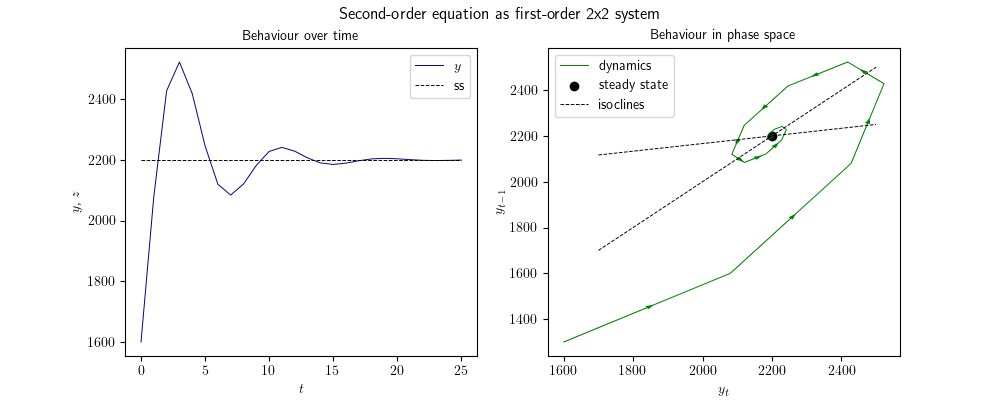

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
plt.suptitle("Second-order equation as first-order 2x2 system")

ax1.set_title("Behaviour over time", fontsize=10)
ax1.plot(results2[0], color="darkblue", lw=0.7, label="$y$")
ax1.plot([2200]*(T+1), color="black", lw=0.7, ls="--", label="ss")
ax1.legend()

ax1.set_xlabel("$t$")
ax1.set_ylabel("$y$, $z$")

#######################

ax2.set_title("Behaviour in phase space", fontsize=10)
ax2.plot(results2[0], results2[1], color="green", label="dynamics", lw=0.7)
ax2.scatter((2200), (2200), color="black", label="steady state")

# arrows for the first 10 steps to indicate direction of motion
for i in range(10):
    x = results2[0, i]
    y = results2[1, i]
    dx = (results2[0, i+1] - results2[0, i]) / 2
    dy = (results2[1, i+1] - results2[1, i]) / 2
    ax2.arrow(x, y, dx, dy, color="green", lw=0.1, head_width=15)
    
# isoclines
y = np.array([1700, 2500]) # two points are enough for straight lines
ybar = y / 6 + 1100 / 0.6
zbar = y
# plot iscoclines
ax2.plot(y, ybar, color="black", lw=0.7, ls="--", label="isoclines")
ax2.plot(y, zbar, color="black", lw=0.7, ls="--")


ax2.set_xlabel("$y_t$")
ax2.set_ylabel("$y_{t-1}$")
ax2.legend()